# import

In [22]:
#import warnings
#warnings.filterwarnings('ignore')

# 데이터 확인
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset 만들기
import keras
from keras.utils import to_categorical

# Detect Face
import cv2
from scipy.ndimage import zoom

# Model
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import batch_normalization
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator

In [23]:
# 라벨 숫자를 문자로 변경
def get_label(argument):
    labels = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}
    return(labels.get(argument, 'Invalid emotion'))

In [24]:
shape_x = 48
shape_y = 48

# 전체 이미지에서 얼굴을 찾아내는 함수
def detect_face(frame):
    
    # cascade pre-trained 모델 불러오기
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # RGB를 gray scale로 바꾸기
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # cascade 멀티스케일 분류
    detected_faces = face_cascade.detectMultiScale(gray,
                                                   scaleFactor = 1.1,
                                                   minNeighbors = 6,
                                                   minSize = (shape_x, shape_y),
                                                   flags = cv2.CASCADE_SCALE_IMAGE
                                                  )
    
    coord = []
    for x, y, w, h in detected_faces:
        if w > 100:
            sub_img = frame[y:y+h, x:x+w]
            coord.append([x, y, w, h])
            
    return gray, detected_faces, coord
#print(cv2.data.haarcascades)

In [25]:
# 전체 이미지에서 찾아낸 얼굴을 추출하는 함수
def extract_face_features(gray, detected_faces, coord, offset_coefficients=(0.075, 0.05)):
    new_face = []
    for det in detected_faces:
        
        # 얼굴로 감지된 영역
        x, y, w, h = det
        
        # 이미지 경계값 받기
        horizontal_offset = np.int(np.floor(offset_coefficients[0] * w))
        vertical_offset = np.int(np.floor(offset_coefficients[1] * h))
        
        # gray scacle 에서 해당 위치 가져오기
        extracted_face = gray[y+vertical_offset:y+h, x+horizontal_offset:x-horizontal_offset+w]
        
        # 얼굴 이미지만 확대
        new_extracted_face = zoom(extracted_face, (shape_x/extracted_face.shape[0], shape_y/extracted_face.shape[1]))
        new_extracted_face = new_extracted_face.astype(np.float32)
        new_extracted_face /= float(new_extracted_face.max()) # sacled
        new_face.append(new_extracted_face)
        
    return new_face

In [26]:
# suzy = cv2.imread('dataset/image.jpeg')
# plt.imshow(cv2.cvtColor(suzy, cv2.COLOR_BGR2RGB))

In [27]:
# # 얼굴 찾기
# gray, detected_faces, coord = detect_face(suzy)

# # 찾은 얼굴 추출하기
# face_zoom = extract_face_features(gray, detected_faces, coord)

# # 시각화
# plt.imshow(face_zoom[0])

# 감정분석 단순모델 구축

In [28]:
model = load_model('data/emotion_recognition.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        36928     
                                                        

In [29]:
# model.save('emotion_recognition.h5')

In [30]:
# # Loss Curves
# plt.figure(figsize=[8,6])
# plt.plot(history.history['loss'],'r',linewidth=2.0)
# plt.plot(history.history['val_loss'],'b',linewidth=2.0)
# plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
# plt.xlabel('Epochs ',fontsize=16)
# plt.ylabel('Loss',fontsize=16)
# plt.title('Loss Curves',fontsize=16)
 
# # Accuracy Curves
# plt.figure(figsize=[8,6])
# plt.plot(history.history['accuracy'],'r',linewidth=2.0)
# plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
# plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
# plt.xlabel('Epochs ',fontsize=16)
# plt.ylabel('Accuracy',fontsize=16)
# plt.title('Accuracy Curves',fontsize=16)

# 결과 확인

(1, 48, 48)
[[[[0.14754099]
   [0.14754099]
   [0.14754099]
   ...
   [0.6352459 ]
   [0.9057377 ]
   [0.9303279 ]]

  [[0.16393442]
   [0.13114753]
   [0.10245901]
   ...
   [0.44672132]
   [0.92622954]
   [0.89344263]]

  [[0.16803278]
   [0.1352459 ]
   [0.1147541 ]
   ...
   [0.15983607]
   [0.8647541 ]
   [0.91803277]]

  ...

  [[0.96311474]
   [0.96311474]
   [0.96311474]
   ...
   [0.9590164 ]
   [0.9590164 ]
   [0.9590164 ]]

  [[0.96311474]
   [0.96311474]
   [0.96311474]
   ...
   [0.96311474]
   [0.96311474]
   [0.96311474]]

  [[0.96311474]
   [0.96311474]
   [0.96311474]
   ...
   [0.96311474]
   [0.96311474]
   [0.96311474]]]]
1/1 [==============================] - 0s 23ms/step
(1, 7)
angry: 7.986059638212286e-05
disgust: 1.4180347241555817e-08
fear: 0.0003001879524749658
happy: 89.20615080787839
sad: 0.00019566005445708327
surprise: 0.002457779690625088
neutral: 10.790815689647326


/var/folders/1s/ybxxswpd0pd6x7wnlhrsp9n40000gn/T/ipykernel_35600/1508287797.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  horizontal_offset = np.int(np.floor(offset_coefficients[0] * w))
/var/folders/1s/ybxxswpd0pd6x7wnlhrsp9n40000gn/T/ipykernel_35600/1508287797.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. I

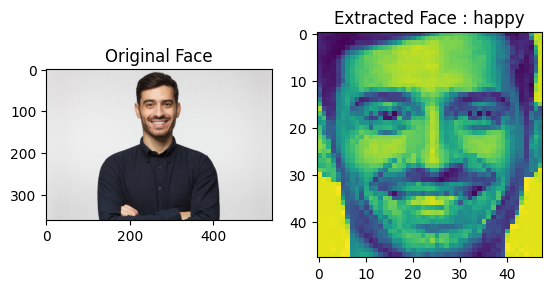

In [44]:
# 원본이미지 확인
face = cv2.imread('./data/image.jpeg')

# 얼굴 추출
gray, detected_faces, coord = detect_face(face)
face_zoom = extract_face_features(gray, detected_faces, coord)
# fz = np.array(face_zoom)
# print(fz.shape)
# 모델 추론
input_data = np.reshape(face_zoom[0].flatten(), (1, 48, 48, 1))
print(input_data)
output_data = model.predict(input_data)
emotion_array = ['angry','disgust','fear','happy','sad','surprise','neutral'];

print(output_data.shape)
for i in range(output_data.shape[1]):
    print(f'{emotion_array[i]}: {(output_data[0][i] / sum(output_data[0]))*100}')
result = np.argmax(output_data)

# 결과 문자로 변환
if result == 0:
    emotion = 'angry'
elif result == 1:
    emotion = 'disgust'
elif result == 2:
    emotion = 'fear'
elif result == 3:
    emotion = 'happy'
elif result == 4:
    emotion = 'sad'
elif result == 5:
    emotion = 'surprise'
elif result == 6:
    emotion = 'neutral'
    
# 시각화
plt.subplot(121)
plt.title("Original Face")
plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))

plt.subplot(122)
plt.title(f"Extracted Face : {emotion}")
plt.imshow(face_zoom[0])